In [110]:
#Import packages
import os

import numpy as np
import pandas as pd
import datetime as dt
import pandas_profiling
import re as re

import scipy.stats as stats
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocess
import sklearn.feature_selection as feature_selection

import statsmodels as st
import statsmodels.formula.api as smp
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [111]:
data = pd.read_csv("House_Prices.csv",sep=",")

In [112]:
display(data.head())

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [113]:
# profile_report = pandas_profiling.ProfileReport(data)

In [114]:
# profile_report.to_file('profile_report.html')

In [115]:
# 1. renaming columns
print("Total Columns : ",len(data))
print("Columns are : ",data.columns)

Total Columns :  128
Columns are :  Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')


In [116]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(5), object(2)
memory usage: 7.1+ KB


In [117]:
# 1. Idendify X and Y variable
# Y = Price
# X = 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood'

In [118]:
# 2. Y varaible should be follow normal distribution
#   there are two methods to check normal distribution
#     - to check use sns displot whether is following normal distribution or not
#     - another method check mean==median==mode should nearly equal

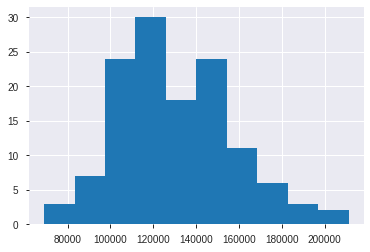

In [119]:
data.Price.hist(bins=10)

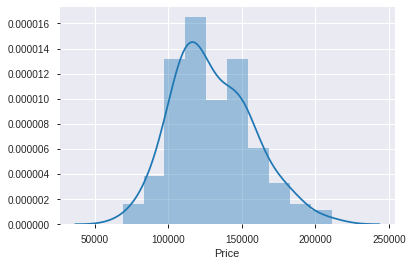

In [120]:
sns.distplot(data.Price)

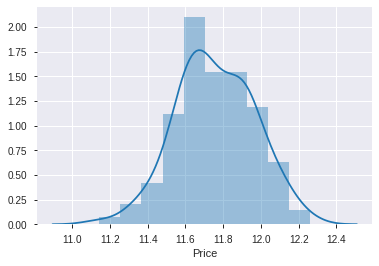

In [121]:
sns.distplot(np.log(data.Price))

In [122]:
#     - another method check mean==median==mode should nearly equal
print("before log")
print("mean of price :",data.Price.mean())
print("median of price :",data.Price.median())
print("mode of price :",data.Price.mode())

print("after log")
print("mean of price :",np.log(data.Price).mean())
print("median of price :",np.log(data.Price).median())
print("mode of price :",np.log(data.Price).mode())


before log
mean of price : 130427.34375
median of price : 125950.0
mode of price : 0    103200
1    105600
2    117800
3    125700
4    129800
dtype: int64
after log
mean of price : 11.757661963940532
median of price : 11.743638311833795
mode of price : 0    11.544424
1    11.567414
2    11.676744
3    11.741653
4    11.773750
dtype: float64


In [123]:
# 2. Data types -Any mismatch in data types?
print(home.info())
home.Brick =np.where(data.Brick=='Yes',1,0).astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(5), object(2)
memory usage: 7.1+ KB
None


In [124]:
# 3. ignore unique value variable
#         home removed
home = data[['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood']]

In [125]:
# 10. Does data have any duplicates?
# 		Key level (one variable or combination of variable)		
# 		Record level	
print("dropped duplicates")
home.drop_duplicates()

dropped duplicates


,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,Yes,East
124,147900,2160,4,3,3,Yes,East
125,113500,2070,2,2,2,No,North
126,149900,2020,3,3,1,No,West


In [126]:
# 4. Does data have any special characters?
#     No
# 5. Does data have any missing values?
# 6. Does data any outliers
# create groups of varaibles continuous and categorical
cat_vars = ["Brick","Neighborhood",'Bathrooms','Bedrooms','Offers']
con_vars = ['Price', 'SqFt']

print("Total Categorical Columns : ",len(cat_vars))
print("Columns are : ",cat_vars)
print("Total Continous Columns : ",len(con_vars))
print("Columns are : ",con_vars)
def dataAuditCon(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(),
                      x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01),
                      x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),
                      x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95),
                      x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN',
                         'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' 
                         ,'P95' ,'P99' ,'MAX'])
def dataAuditCat(x):
    return pd.Series({"NMISS":x.isnull().sum()})

temp1 = home[con_vars].apply(dataAuditCon,axis=0).T
temp2 = home[cat_vars].apply(dataAuditCat).T
dataAudits = pd.concat([temp1,temp2])

# display(home[cat_vars].apply(dataAuditCat).T)
display(dataAudits[['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN',
                         'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' 
                         ,'P95' ,'P99' ,'MAX']])




Total Categorical Columns :  5
Columns are :  ['Brick', 'Neighborhood', 'Bathrooms', 'Bedrooms', 'Offers']
Total Continous Columns :  2
Columns are :  ['Price', 'SqFt']


/home/vijay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Price,128.0,0.0,16694700.0,130427.34375,125950.0,26868.770371,7.219308e+08,69100.0,81570.0,91310.0,102020.0,111325.0,125950.0,148250.0,166560.0,179465.0,196476.0,211200.0
SqFt,128.0,0.0,256120.0,2000.93750,2000.0,211.572431,4.476289e+04,1450.0,1530.8,1664.0,1720.0,1880.0,2000.0,2140.0,2250.0,2368.0,2505.7,2590.0
Brick,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighborhood,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bathrooms,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bedrooms,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Offers,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
def removeOutlier(x,quantileValue = .99):    
    x.clip_upper(x.quantile(quantileValue));
    x.clip_lower(x.quantile(round(1.-quantileValue,2)))
    return x

home[con_vars] = home[con_vars].apply(lambda x:removeOutlier(x,0.95))

# home["Price"] = home["Price"].clip_upper(home["Price"].quantile(.9))
# home["Price"] = home["Price"].clip_lower(home["Price"].quantile(.1))


# home["SqFt"] = home["SqFt"].clip_upper(home["SqFt"].quantile(.9))
# home["SqFt"] = home["SqFt"].clip_lower(home["SqFt"].quantile(.1))

temp1 = home[con_vars].apply(dataAuditCon,axis=0).T
temp2 = home[cat_vars].apply(dataAuditCat).T
dataAudits = pd.concat([temp1,temp2])


/home/vijay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
/home/vijay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vijay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [128]:
data_cat = home[cat_vars]
data_con = home[con_vars]

In [130]:
data_final = pd.concat([data_con, data_cat], axis=1)
data_final[cat_vars]= data_final[cat_vars].astype(object)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
Price           128 non-null int64
SqFt            128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
Bathrooms       128 non-null object
Bedrooms        128 non-null object
Offers          128 non-null object
dtypes: int64(2), object(5)
memory usage: 7.1+ KB


In [131]:
data_final = pd.get_dummies(data_final,['Brick', 'Neighborhood', 'Bathrooms', 'Bedrooms', 'Offers'], drop_first=True)

In [132]:
display(data_final)

,Price,SqFt,Brick_Yes,Neighborhood_North,Neighborhood_West,Bathrooms_3,Bathrooms_4,Bedrooms_3,Bedrooms_4,Bedrooms_5,Offers_2,Offers_3,Offers_4,Offers_5,Offers_6
0,114300,1790,0,0,0,0,0,0,0,0,1,0,0,0,0
1,114200,2030,0,0,0,0,0,0,1,0,0,1,0,0,0
2,114800,1740,0,0,0,0,0,1,0,0,0,0,0,0,0
3,94700,1980,0,0,0,0,0,1,0,0,0,1,0,0,0
4,119800,2130,0,0,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,119700,1900,1,0,0,1,0,1,0,0,0,1,0,0,0
124,147900,2160,1,0,0,1,0,0,1,0,0,1,0,0,0
125,113500,2070,0,1,0,0,0,0,0,0,1,0,0,0,0
126,149900,2020,0,0,1,1,0,1,0,0,0,0,0,0,0


In [133]:
data_final.columns

Index(['Price', 'SqFt', 'Brick_Yes', 'Neighborhood_North', 'Neighborhood_West',
       'Bathrooms_3', 'Bathrooms_4', 'Bedrooms_3', 'Bedrooms_4', 'Bedrooms_5',
       'Offers_2', 'Offers_3', 'Offers_4', 'Offers_5', 'Offers_6'],
      dtype='object')

In [134]:
#Calculating CV for all the variables 
cv_vars = data_final.apply(lambda x: np.mean(x)/np.std(x) )

In [135]:
print(cv_vars.sort_values(ascending=False))

SqFt                  9.494620
Price                 4.873309
Bedrooms_3            1.048027
Bathrooms_3           0.868000
Offers_3              0.748983
Neighborhood_North    0.723747
Brick_Yes             0.698836
Neighborhood_West     0.661968
Offers_2              0.625543
Bedrooms_4            0.541229
Offers_4              0.417507
Offers_5              0.154919
Bedrooms_5            0.125988
Offers_6              0.088736
Bathrooms_4           0.088736
dtype: float64


In [26]:
# droping column whose CV is lese then .05 (<.05)
del data_final["Bathrooms_4"]
del data_final["Offers_6"]

In [27]:
data_final['ln_price'] = np.log(data_final.Price)

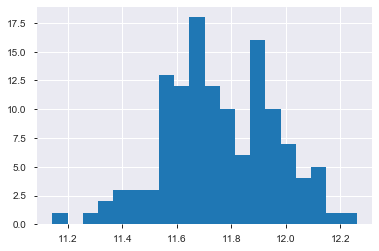

In [28]:
#Assumptions check
#Normality
np.log(data_final.Price).hist(bins=20)

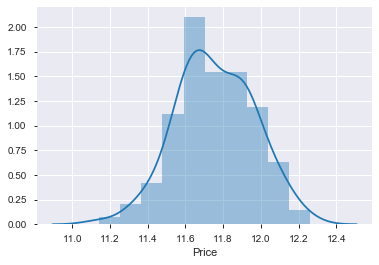

In [29]:
sns.distplot(np.log(data_final.Price))

In [30]:
data_final.columns

Index(['Price', 'SqFt', 'Brick_1', 'Neighborhood_North', 'Neighborhood_West',
       'Bathrooms_3', 'Bedrooms_3', 'Bedrooms_4', 'Bedrooms_5', 'Offers_2',
       'Offers_3', 'Offers_4', 'Offers_5', 'ln_price'],
      dtype='object')

In [31]:
#Feature Reduction

In [32]:
#using Linearity assumption (Y & X should have linear relationship)
corr_mat = data_final.corr()
corr_mat.to_csv('corr_mat.csv')

In [33]:
#RFE - Recursive Feature Elimination

In [35]:
features = data_final[data_final.columns.difference( ['ln_price', 'Price'] )]
target = data_final['Price']

In [36]:
display(features)

,Bathrooms_3,Bedrooms_3,Bedrooms_4,Bedrooms_5,Brick_1,Neighborhood_North,Neighborhood_West,Offers_2,Offers_3,Offers_4,Offers_5,SqFt
0,0,0,0,0,0,0,0,1,0,0,0,1790
1,0,0,1,0,0,0,0,0,1,0,0,2030
2,0,1,0,0,0,0,0,0,0,0,0,1740
3,0,1,0,0,0,0,0,0,1,0,0,1980
4,1,1,0,0,0,0,0,0,1,0,0,2130
...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,1,0,0,1,0,0,0,1,0,0,1900
124,1,0,1,0,1,0,0,0,1,0,0,2160
125,0,0,0,0,0,1,0,1,0,0,0,2070
126,1,1,0,0,0,0,1,0,0,0,0,2020


In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import itertools

In [38]:
#lm = LinearRegression()
lm = RandomForestRegressor()

# create the RFE model and select 10 attributes
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(features, target)

/Users/avishkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/avishkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/avishkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
features.columns[rfe.support_]

Index(['Bathrooms_3', 'Bedrooms_3', 'Bedrooms_4', 'Brick_1',
       'Neighborhood_North', 'Neighborhood_West', 'Offers_2', 'Offers_3',
       'Offers_4', 'SqFt'],
      dtype='object')

In [41]:
#Moudles related to feature selection
from sklearn.feature_selection import SelectKBest, f_regression, f_oneway

In [42]:
#SelectKbest
SKB = SelectKBest(f_oneway, k=10).fit(features, target )

In [43]:
SKB.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [45]:
features.columns[SKB.get_support()]

Index(['Bathrooms_3', 'Bedrooms_4', 'Bedrooms_5', 'Brick_1',
       'Neighborhood_North', 'Neighborhood_West', 'Offers_2', 'Offers_3',
       'Offers_4', 'Offers_5'],
      dtype='object')

In [46]:
#Using F-Regression
#F-Regression # Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(  features, target )

In [47]:
itertools.zip_longest(features.columns, F_values, p_values)

In [48]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

In [49]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [50]:
f_reg_results.sort_values(by=['F_Value'], ascending=False, inplace=True)

In [51]:
f_reg_results.to_csv('f_reg_results.csv')

In [52]:
data_final.columns

Index(['Price', 'SqFt', 'Brick_1', 'Neighborhood_North', 'Neighborhood_West',
       'Bathrooms_3', 'Bedrooms_3', 'Bedrooms_4', 'Bedrooms_5', 'Offers_2',
       'Offers_3', 'Offers_4', 'Offers_5', 'ln_price'],
      dtype='object')

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Final_list = [
    'Brick_1',
    'Neighborhood_North',
    'Neighborhood_West',
    'Bathrooms_3',
    'Bedrooms_3',
    'Bedrooms_4',
    'Bedrooms_5',
    'Offers_2',
    'Offers_3',
    'Offers_4',
    'Offers_5',
]

In [54]:
X=features[Final_list]

In [55]:
variance_inflation_factor(X.values, 2)

2.3881147986551308

In [56]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.sort_values(by='VIF_Factor', ascending=False)

,VIF_Factor,features
4,3.222215,Bedrooms_3
8,3.097269,Offers_3
5,2.988399,Bedrooms_4
2,2.388115,Neighborhood_West
3,2.371423,Bathrooms_3
9,2.121274,Offers_4
1,1.985718,Neighborhood_North
7,1.913774,Offers_2
0,1.529782,Brick_1
10,1.259629,Offers_5


In [57]:
#Split the data into train & test
train, test = train_test_split(data_final, test_size=0.3, random_state=123)

In [58]:
data_final.shape

(128, 14)

In [59]:
train.shape

(89, 14)

In [60]:
test.shape

(39, 14)

In [61]:
target

0      114300
1      114200
2      114800
3       94700
4      119800
        ...  
123    119700
124    147900
125    113500
126    149900
127    124600
Name: Price, Length: 128, dtype: int64

In [64]:
'ln_price ~ ' + "+".join(Final_list)

'ln_price ~ Brick_1+Neighborhood_North+Neighborhood_West+Bathrooms_3+Bedrooms_3+Bedrooms_4+Bedrooms_5+Offers_2+Offers_3+Offers_4+Offers_5'

In [65]:
formula = 'ln_price ~ Brick_1+Neighborhood_North+Neighborhood_West+Bathrooms_3+Bedrooms_3+Bedrooms_4+Bedrooms_5+Offers_2+Offers_3+Offers_4+Offers_5'

In [66]:
#ols_model = smp.ols(formula = 'y~x1+x2+x3+...', data=train).fit()
ols_model = smp.ols(formula = formula, data=train).fit()

In [67]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     20.43
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           1.43e-18
Time:                        21:48:37   Log-Likelihood:                 76.488
No. Observations:                  89   AIC:                            -129.0
Df Residuals:                      77   BIC:                            -99.11
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.6110      0

In [68]:
train_predicted = np.exp(ols_model.predict(train))
test_predicted = np.exp(ols_model.predict(test))

In [69]:
train_actual = np.exp(train.ln_price)
test_actual = np.exp(test.ln_price)

In [70]:
train_RMSE = np.sqrt(np.mean(np.square(train_actual-train_predicted)))
test_RMSE  = np.sqrt(np.mean(np.square(test_actual-test_predicted)))

In [71]:
print(train_RMSE)
print(test_RMSE)

12657.124000335089
14823.88190794351


In [72]:
train_MAPE = np.mean(np.abs(train_actual-train_predicted)/train_actual)
test_MAPE  = np.mean(np.abs(test_actual-test_predicted)/test_actual)
print(train_MAPE)
print(test_MAPE)

0.0798957811889343
0.08458797626281876


In [73]:
train_RMSPE = np.sqrt(np.mean(np.square((train_actual-train_predicted)/train_actual)))
test_RMSPE  = np.sqrt(np.mean(np.square((test_actual-test_predicted)/test_actual)))
print(train_RMSPE)
print(test_RMSPE)

0.10554964760367794
0.12359467421218516


In [74]:
np.corrcoef(train_actual, train_predicted)

array([[1.        , 0.88004631],
       [0.88004631, 1.        ]])

In [75]:
np.corrcoef(test_actual, test_predicted)

array([[1.        , 0.84689613],
       [0.84689613, 1.        ]])

In [76]:
#assumptions check
#Errors following normal distribution
#Errors should not have relationship with Y

train_errors = train_actual-train_predicted
test_errors = test_actual-test_predicted

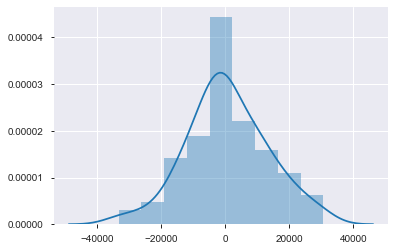

In [77]:
sns.distplot(train_errors)

In [78]:
np.corrcoef(train_actual, train_errors)

array([[1.        , 0.45919351],
       [0.45919351, 1.        ]])

In [79]:
#Decile analysis
train_results = pd.concat([train_actual, train_predicted], axis=1)
test_results = pd.concat([test_actual, test_predicted], axis=1)

In [80]:
train_results.columns = ['actual', 'pred']
test_results.columns = ['actual', 'pred']

In [81]:
train_results['Deciles']=pd.qcut(train_results['pred'],10, labels=False)

In [82]:
test_results['Deciles']=pd.qcut(test_results['pred'],10, labels=False)

In [83]:
train_results.groupby(['Deciles']).apply(mean)[['actual','pred']]

,actual,pred
Deciles,,
0,102822.222222,100151.654926
1,102955.555556,103721.301682
2,104488.888889,107638.123432
3,112077.777778,113053.598270
4,118420.000000,119066.068441
5,133585.714286,124949.841132
6,134718.181818,130179.124977
7,137275.000000,140644.285919
8,157662.500000,153737.292504


In [84]:
test_results.groupby(['Deciles']).apply(mean)[['actual','pred']]

,actual,pred
Deciles,,
0,104700.0,101678.198053
1,112350.0,107168.677026
2,123150.0,116552.617450
3,114150.0,122587.666607
4,139875.0,130616.310063
5,137000.0,141055.972888
6,154680.0,148103.293695
7,150400.0,158105.680692
8,159775.0,174642.162252


In [85]:
#### Lets save everything in metrics_df to pickle object
import pickle

# now you can save it to a file
with open('ols_model.pkl', 'wb') as f:
    pickle.dump(ols_model, f)

In [ ]:
# and later you can load it
with open('ols_model.pkl', 'rb') as f:
    model_new = pickle.load(f)